In [ ]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [ ]:
import tensorflow as tf
from keras import backend as B
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
import keras
from data_preprocessing import read_dataset
import cv2

In [ ]:
def read_dataset(dataset_path):
	# reading JSON file
	# 'data_set_16_07_2021.json'
	with open(dataset_path, "r") as file:
		data = json.load(file)

	X = np.array(data['dataset'][0]) # X images tensors data structure
	Y = np.array(data['dataset'][1]) # Y data sturucture of true angles

	return X,Y

In [ ]:
X,Y = read_dataset('data_set_16_07_2021.json')
X = X/127.5 - 1.0 #preprocessing data
# splitting the data set for training and the test part
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
B.clear_session()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(24, (10, 10), strides=(3, 3),padding="same", activation='tanh', input_shape=(130, 320, 3)))
model.add(layers.AveragePooling2D((3, 3)))
model.add(layers.Conv2D(36, (7, 7), strides=(2, 2),padding = "same", activation='tanh'))
model.add(layers.AveragePooling2D((4, 4)))
model.add(layers.Conv2D(48, (10, 10), strides=(3, 3),padding = "same", activation='tanh'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(50, activation='elu'))
model.add(layers.Dense(10, activation='elu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 107, 24)       7224      
                                                                 
 average_pooling2d (AverageP  (None, 14, 35, 24)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 18, 36)         42372     
                                                                 
 average_pooling2d_1 (Averag  (None, 1, 4, 36)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 2, 48)          172848    
                                                                 
 dropout (Dropout)           (None, 1, 2, 48)          0

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 163ms/step - loss: 0.3165 - mae: 0.5013 - val_loss: 0.0275 - val_mae: 0.1615
Epoch 2/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0525 - mae: 0.1731 - val_loss: 0.0494 - val_mae: 0.1945
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 0.0322 - mae: 0.1417 - val_loss: 0.0474 - val_mae: 0.1920
Epoch 4/500
2/2 [==============================] - 0s 28ms/step - loss: 0.0629 - mae: 0.2045 - val_loss: 0.0536 - val_mae: 0.2114
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.0572 - mae: 0.2055 - val_loss: 0.0089 - val_mae: 0.0630
Epoch 6/500
2/2 [==============================] - 0s 29ms/step - loss: 0.0191 - mae: 0.1097 - val_loss: 0.0161 - val_mae: 0.1064
Epoch 7/500
2/2 [==============================] - 0s 36ms/step - loss: 0.0183 - mae: 0.1091 - val_loss: 0.0192 - val_mae: 0.1074
Epoch 8/500
2/2 [==============================] - 0s 33ms/step - loss: 0.0180 - mae: 0.1059 - val_lo

Text(0, 0.5, 'Mean absolute error')

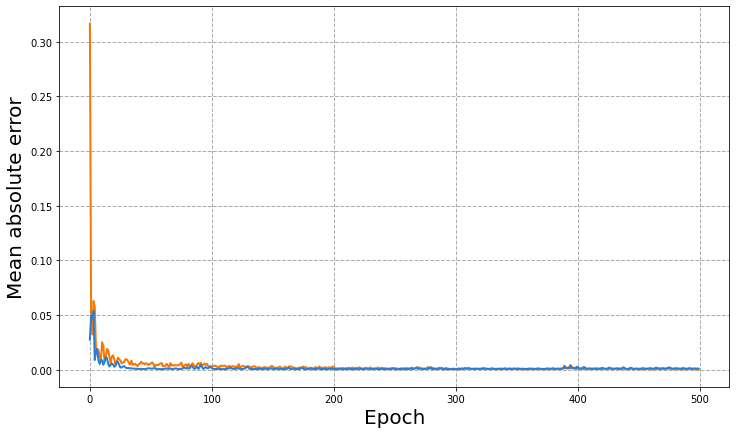

In [ ]:
from keras import callbacks
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.8,
                                         patience=5,
                                         verbose=1,
                                         min_delta=0.00001,
                                         cooldown=0,
                                         min_lr=0.000001)

opt = tf.keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer='adamax',loss='mse',metrics='mae', ) # set optimizer and metrics of precission and loss function 
history = model.fit(x_train, y_train, batch_size = 16,#callbacks = [reduce_learning_rate],
                    epochs=500, validation_data=(x_test, y_test),verbose=1) # fit model on train data with certain number of epochs 
                                                                            # and batch_size and also validation data
plt.rcParams["figure.figsize"] = (12,7) # plotsize
plt.plot(history.history['loss'], color = '#F77800', label = 'train', linewidth=2)
plt.plot(history.history['val_loss'], color = '#2B7CD3', label = 'test', linewidth=2) #plothistory
plt.grid(color='#ADADAD', linestyle='--', linewidth=1) # setup grid
plt.xlabel('Epoch', fontsize = 20) # x label
plt.ylabel('Mean absolute error', fontsize = 20) # y label
# plt.legend(['train MAE loss', 'test MAE loss'], fontsize = 20)

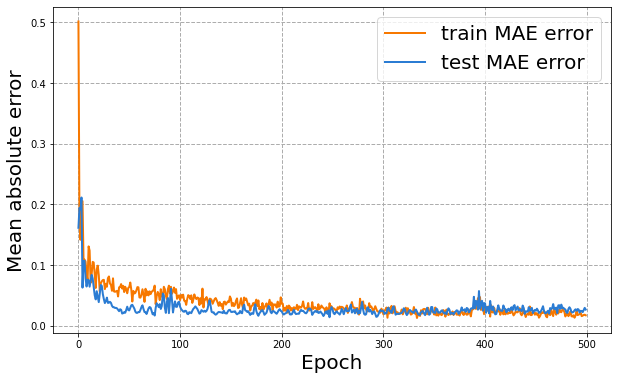

In [ ]:
plt.rcParams["figure.figsize"] = (10,6) # plotsize
plt.plot(history.history['mae'], color = '#F77800', linewidth=2)
plt.plot(history.history['val_mae'], color = '#2B7CD3', linewidth=2) #plothistory
plt.grid(color='#ADADAD', linestyle='--', linewidth=1) # setup grid
plt.xlabel('Epoch', fontsize = 20) # x label
plt.ylabel('Mean absolute error', fontsize = 20) # y label
plt.legend(['train MAE error', 'test MAE error'], fontsize = 20)

In [ ]:
model.layers[0].output[0][0]

<KerasTensor: shape=(107, 24) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

(44, 107, 24)


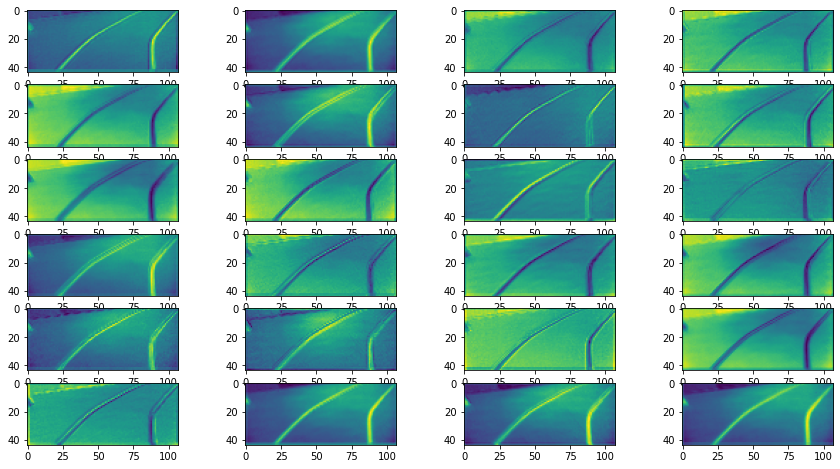

In [ ]:
image=cv2.imread('T045M102_11.jpeg', cv2.IMREAD_UNCHANGED)
reshaped_img = cv2.resize(image, (320, 180), interpolation=cv2.INTER_LINEAR)
reshaped_img = reshaped_img[50:180, 0:320]
new_img = np.array([reshaped_img.tolist()], dtype = np.float32)
new_img = new_img/127.5 - 1.0
ixs = [0]
outputs = [model.layers[i].output for i in ixs]
model_ = Model(inputs=model.inputs, outputs=outputs)
features = model_.predict(new_img)
print(features[0].shape)
square = 5
fig = plt.figure(figsize=(15,8))
for i in range(1,features.shape[3]+1):
    plt.subplot(6,4,i)
    plt.imshow(features[0,:,:,i-1] , cmap='viridis')
plt.show()

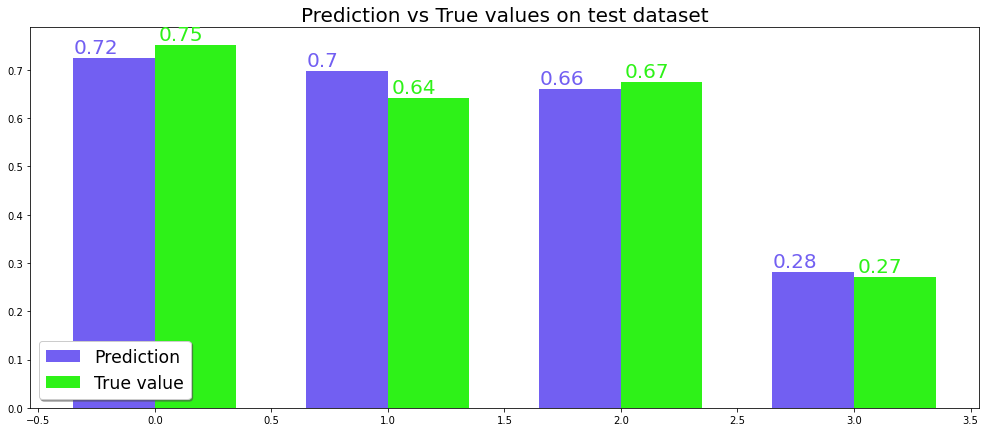

In [ ]:
plt.rcParams["figure.figsize"] = (17,7)

values = []
true_values = []
for i,j in enumerate(x_test):
  img = np.array([j])
  predict = model.predict(img)
#   predict = 1.05*predict if predict > 0.65 else predict*0.95
  values.append(float(predict[0]))
  true_values.append(float(y_test[i]))


x = np.arange(len(values))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values, width, label='Prediction', color = '#725FF2')
rects2 = ax.bar(x + width/2, true_values, width, label='True value', color = '#2EF218')

for rect, label in zip(rects1,values):
    ax.text(rect.get_x(), rect.get_height()+0.01, round(label,2),color='#725FF2',fontsize=20)

for rect, label in zip(rects2,true_values):
    ax.text(rect.get_x()+0.0175, rect.get_height()+0.01, round(label,2),color='#2EF218',fontsize=20)

ax.legend(loc='lower left', shadow=True, fontsize='xx-large')
ax.set_title('Prediction vs True values on test dataset',fontsize = 20)


plt.show()
# img = np.array([x_test[13]])
# print(img.shape)
# print(model.predict(img), y_test[13])

In [ ]:
interpreter = tf.lite.Interpreter('model_3__mae_0_0168.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()	
interpreter.allocate_tensors()

values = []
true_values = []
for i,j in enumerate(x_test):
    # img = np.array([j], dtype=tf.float32)
    new_img = np.array(j.tolist(),dtype= np.float32)
    interpreter.set_tensor(input_details[0]['index'], [new_img])
    interpreter.invoke()
    predict = interpreter.get_tensor(output_details[0]['index'])
    values.append(float(predict))
    true_values.append(float(y_test[i]))

x = np.arange(len(values))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values, width, label='Prediction', color = '#725FF2')
rects2 = ax.bar(x + width/2, true_values, width, label='True value', color = '#2EF218')

for rect, label in zip(rects1,values):
    ax.text(rect.get_x(), rect.get_height()+0.01, round(label,2),color='#725FF2',fontsize=20)

for rect, label in zip(rects2,true_values):
    ax.text(rect.get_x()+0.0175, rect.get_height()+0.01, round(label,2),color='#2EF218',fontsize=20)

ax.legend(loc='lower left', shadow=True, fontsize='xx-large')
ax.set_title('Prediction vs True values on test dataset',fontsize = 20)
plt.xlabel('Test image sample', fontsize = 20) # x label
plt.ylabel('Angle value', fontsize = 20)
plt.rcParams["figure.figsize"] = (17,8)
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

model_name = f'model_3__mae_{val_mae}.tflite'
with open(model_name, 'wb') as f:
  f.write(tflite_model)

In [ ]:
def val_map(value, istart, istop, ostart, ostop):
	return float(ostart + (ostop - ostart) * ((value - istart) / (istop - istart)))

In [ ]:
interpreter = tf.lite.Interpreter('model_3__mae_0_0168.tflite')
	# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
	
interpreter.allocate_tensors()

import cv2
img_name = 'T042M090_27.jpeg'
img = cv2.imread(img_name, cv2.IMREAD_UNCHANGED)
new_img = cv2.resize(img, (320, 180), interpolation=cv2.INTER_LINEAR)
reshaped_img = new_img[50:180, 0:320]
new_img = np.array(reshaped_img.tolist(),dtype= np.float32)
new_img = new_img/127.5 - 1.0

interpreter.set_tensor(input_details[0]['index'], [new_img])
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
turn = val_map(output_data, 0.01, 0.99, 110, 20)
print(turn)